In [75]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Énoncé
Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante : https://datacatalog.worldbank.org/dataset/education-statistics 
Ou en téléchargement direct à ce lien.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site : http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

## Partie 1 - Inspection des données 
<span style="color: #00FFFF">Chargez le fichier `EdStatsData.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `EdStatsData`.

<span style="color: #00FFFF">Chargez le fichier `EdStatsCountry.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `EdStatsCountry`.

<span style="color: #00FFFF">Les colonnes du fichier sont uniquement séparées par des virgules. </span>

In [77]:
EdStatsData = pd.read_csv('EdStatsData.csv', sep =',')
EdStatsCountry = pd.read_csv('EdStatsCountry.csv', sep =',')
EdStatsFootNote = pd.read_csv('EdStatsFootNote.csv', sep =',')
EdStatsCountry_Series = pd.read_csv('EdStatsCountry-Series.csv', sep =',')
EdStatsSeries = pd.read_csv('EdStatsSeries.csv', sep =',')

<span style="color: #00FFFF"> On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `EdStatsData`.

In [78]:
print(EdStatsData.shape)
EdStatsData.head()

(886930, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #00FFFF">  Le nombre de pays dans `EdStatsData`:
</span>

In [83]:
EdStatsData['Country Name'].nunique()

242

<span style="color: #00FFFF">  Le nombre d'indicateurs dans `EdStatsData`:
</span>

In [82]:
EdStatsData['Indicator Name'].nunique()

3665

<span style="color: #00FFFF"> On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `EdStatsCountry` et sa taille.

In [79]:
print(EdStatsCountry.shape)
EdStatsCountry.head()

(241, 32)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


<span style="color: #00FFFF"> On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `EdStatsSeries` et sa taille.

In [80]:
print(EdStatsSeries.shape)
EdStatsSeries.head()

(3665, 21)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: #00FFFF"> On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `EdStatsCountry-Series`.

In [ ]:
print(EdStatsCountry_Series.shape)
EdStatsCountry_Series.head()

(613, 4)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


<span style="color: #00FFFF"> On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `EdStatsFootNote`.

In [ ]:
print(EdStatsFootNote.shape)
EdStatsFootNote.head()

(643638, 5)


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


=================================================================================================================================

<span style="color: #00FFFF"> Affichez le type des colonnes dans `EdStatsData`dans le dataframe `EdStatsData`.
</span>

In [ ]:
EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

<span style="color: #00FFFF"> Vérifiez s'il existe des valeurs manquantes dans ce jeu de données dans le dataframe `EdStatsData` :
</span>

In [ ]:
EdStatsData.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

<span style="color: #00FFFF"> Vérifiez s'il existe des doublons pour la variable `Country Code` et `Country Name` dans le dataframe `EdStatsData`:
</span>

In [ ]:
EdStatsData.duplicated('Country Code').sum()

886688

In [ ]:
EdStatsData.duplicated('Country Name').sum()

886688

<span style="color: #00FFFF"> Affichez tous les noms de la variable `Country Name` dans le dataframe `EdStatsData` :
</span>

In [ ]:
EdStatsData['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


<span style="color: #00FFFF">Affichez toutes les colonnes dans le dataframe `EdStatsCountry`
</span>

In [ ]:
EdStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

## Partie 2 - Nettoyage de connées
<span style="color: #00FFFF">  Construisez un dataframe nommé `country` qui est un extrait du dataframe `EdStatsData` et qui ne contient que les pays .
- Tout d'abord, on va supprimer toutes les régions et les catégories des 'incomes'.
- Ensuite, on construit un datafrmae nommé `region` qui ne contient que les régions.
</span>

<span style="color: #00FFFF"> On récupère une partie des noms de région et d'income dans le jeu de données `EdStatsCountry` et une aure partie des noms dans la filtration des pays plus tard.
</span>

In [ ]:
EdStatsCountry.Region.value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

<span style="color: #00FFFF"> Regroupez toutes les régions et les incommes dans deux listes nommées `values_region` et `values_income`.
</span>

In [ ]:
EdStatsCountry['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

In [ ]:
values_region = ['World','Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa','East Asia & Pacific', 'North America',
                 'Euro area','East Asia & Pacific (excluding high income)', 'Latin America & Caribbean (excluding high income)',
                 'Europe & Central Asia (excluding high income)','Sub-Saharan Africa (excluding high income)', 'Middle East & North Africa (excluding high income)', 
                 'Least developed countries: UN classification', 'Heavily indebted poor countries (HIPC)','West Bank and Gaza','European Union','Central African Republic','South Africa'
                 ]
values_income = ['Low income','Lower middle income','Low & middle income', 'Middle income', 'Upper middle income','High income','High income: OECD','High income: nonOECD']

<span style="color: #00FFFF"> Créer un datafrmae nommées `country` qui est un extrait de dataframe `EdStatsData` et qui ne contient que les informations sur les pays.
</span>

In [ ]:
country = EdStatsData.copy()
indexName = country[country['Country Name'].isin(values_income)].index.union(country[country['Country Name'].isin(values_region)].index)
country.drop(indexName, inplace=True)
country.shape

(791640, 70)

<span style="color: #00FFFF"> Créer un datafrmae nommées `region` qui est un extrait de dataframe `EdStatsData` et qui ne contient que les informations sur les régions.
</span>

In [ ]:
region = EdStatsData.copy()
region = region[region ['Country Name'].isin(EdStatsCountry.Region.tolist())]
region.shape

(25655, 70)

In [ ]:
# ********************test*******************
income = EdStatsData[EdStatsData['Country Name'].isin(values_income)]
print(income['Country Name'].unique())

['High income' 'Low & middle income' 'Low income' 'Lower middle income'
 'Middle income' 'Upper middle income']


<span style="color: #808080"> ===========================================================================
 </span>

### Trouvez les indicateurs d'analyse

<span style="color: #00FFFF"> Essayer de trouver les indicateurs intéressants pour notre stratégie dans le dataframe `country`:
- Affichez le pourcentage des valeurs manquantes des colonnes entre l'année 2001 et l'année 2030 :
</span>

In [ ]:
# test : Identifier un indicateur
EdStatsData[EdStatsData['Indicator Name']=='Human Capital Index (HCI): Expected Years of School, Total']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [ ]:
EdStatsData.iloc[:,35:55].isna().mean()

2001    0.860745
2002    0.859961
2003    0.853018
2004    0.854764
2005    0.792421
2006    0.841800
2007    0.845228
2008    0.848481
2009    0.839775
2010    0.726650
2011    0.835374
2012    0.833962
2013    0.844961
2014    0.871705
2015    0.852234
2016    0.981442
2017    0.999839
2020    0.942007
2025    0.942007
2030    0.942007
dtype: float64

In [ ]:
find_indicator =EdStatsData.groupby('Indicator Name')[['2014']].mean()
find_indicator = find_indicator.dropna()
len(find_indicator)

1972

In [ ]:
find_indicator =EdStatsData.groupby('Indicator Name')[['2016']].mean()
find_indicator = find_indicator.dropna()
len(find_indicator)

419

In [ ]:
find_indicator[300:310]

,2016
Indicator Name,
SABER: (Engaging the Private Sector) Policy Goal 3 Lever 3: Financial Support,1.666667
"SABER: (Engaging the Private Sector) Policy Goal 3: Empowering all parents, students, and communities",1.833333
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 1: Tuition fees,3.166667
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 2: Ownership,3.833333
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 3: Certification standards,2.166667
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 4: Market entry,3.166667
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 5: Regulatory fees,3.000000
SABER: (Engaging the Private Sector) Policy Goal 4: Promoting diversity of supply,3.000000
"SABER: (Engaging the Private Sector, Government funded) Policy Goal 5 Lever 1: Teacher standards",2.500000


<span style="color: #00FFFF"> Choisissez un indicateur pour estimer le développement du projet dans le futrue : 
- Est-ce qu'il y a suffissament des jeunnes qui vont s'inscrire aux cours pour les niveaux lycéen et universitarie?
</span>

In [ ]:
index_future = EdStatsData.loc[~EdStatsData['2030'].isna()].index
len(EdStatsData['Indicator Name'][index_future].unique())
EdStatsData['Indicator Name'][index_future].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

<span style="color: #808080"> ===========================================================================
 </span>

<span style="color: #00FFFF"> 12 indicateurs choisits pour construire une stratégie :
</span>

In [ ]:
values_indicator=['Internet users (per 100 people)', 
                 'Population, total', 
                 
                 'GNI per capita, PPP (current international $)',        
                 'Percentage of enrolment in tertiary education in private institutions (%)',
                 'Percentage of enrolment in upper secondary education in private institutions (%)',
                 
                 'Enrolment in tertiary education, all programmes, both sexes (number)',
                 'Enrolment in upper secondary education, both sexes (number)',
                 'Population of the official age for upper secondary education, both sexes (number)',
                 'Population of the official age for tertiary education, both sexes (number)',

                 'School life expectancy, primary to tertiary, both sexes (years)',
                 
                 'Population of the official age for secondary education, both sexes (number)',
                 'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'
                ]

<span style="color: #808080"> ===========================================================================
 </span>

<span style="color: #00FFFF"> Nettoyez le dataframe `country` avec les indicateurs choisis &  gardez les colonnes d'année entre 2011 et 2100.
</span>

In [ ]:
country = country[country['Indicator Name'].isin(values_indicator)]
country= country[['Country Name', 'Country Code', 'Indicator Name',  '2011', '2012', '2013', '2014', '2015', '2016', '2017', 
                  '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',]]
country.shape

(2592, 27)

In [ ]:
country['Indicator Name'].unique()

array(['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'GNI per capita, PPP (current international $)',
       'Internet users (per 100 people)',
       'Percentage of enrolment in tertiary education in private institutions (%)',
       'Percentage of enrolment in upper secondary education in private institutions (%)',
       'Population of the official age for secondary education, both sexes (number)',
       'Population of the official age for tertiary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)',
       'Population, total',
       'School life expectancy, primary to tertiary, both sexes (years)',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'],
      dtype=object)

<span style="color: #00FFFF"> Nettoyez le dataframe `region` avec les indicateurs choisis &  gardez les colonnes d'année entre 2011 et 2100.
</span>

In [ ]:
region = region[region['Indicator Name'].isin(values_indicator)]
region= region[['Country Name', 'Country Code', 'Indicator Name',  '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020',
                '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',]]
region.shape

(84, 27)

=========================================================================================================================

<span style="color: #00FFFF"> Affichant les pourcentage des valeurs manquantes de colonne `2011` jusqu'à colonne `2030`.
</span>

In [ ]:
country[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030']].isna().mean()

2011    0.297840
2012    0.308256
2013    0.318287
2014    0.334491
2015    0.396991
2016    0.646991
2017    1.000000
2020    0.937114
2025    0.937114
2030    0.937114
dtype: float64

<span style="color: #00FFFF"> On crée un tableau de contingence nommé `country_potentiel` avec l'année de `2013` pour définir une stratégie.
</span> 

In [ ]:
country_potentiel = country.pivot_table(values='2013', index = 'Country Name', columns= 'Indicator Name', dropna=True)

In [ ]:
#test 
country_potentiel.loc[['Korea, Rep.']]

Indicator Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),Percentage of enrolment in upper secondary education in private institutions (%),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total","School life expectancy, primary to tertiary, both sexes (years)"
Country Name,,,,,,,,,,,
"Korea, Rep.",3342264.0,1903857.0,32850.0,84.77,80.668854,43.66021,3806527.0,3505427.0,2031081.0,50428893.0,16.58975


<span style="color: #00FFFF"> On ajout une colonne :
- `Interner users (nomber)` dans `country_potentiel`.
</span> 

In [ ]:
country_potentiel['Internet users (nomber)']= country_potentiel['Internet users (per 100 people)']*country_potentiel['Population, total']/100

<span style="color: #FFFF00"> On effecue la première filtration par : 
- `le nombre d'utilisateurs d'internet > 1.0e+06`
</span>

In [ ]:
mask_internet =country_potentiel['Internet users (nomber)']>1.0e+06
country_potentiel = country_potentiel.loc[mask_internet]
print("Le nombre de pays filtrés : ",  len(country_potentiel.index))
print(country_potentiel.index.tolist())

Le nombre de pays filtrés :  122
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Arab World', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Netherlands', 'Ne

<span style="color: #FFFF00"> On effecue la quatième filtration par :
- `le nombre des élèves inscrite aus lycées et universités privées > 1.0e+05`
</span>

In [ ]:
x=country_potentiel['Enrolment in tertiary education, all programmes, both sexes (number)']*country_potentiel['Percentage of enrolment in tertiary education in private institutions (%)']
y=country_potentiel['Enrolment in upper secondary education, both sexes (number)']*country_potentiel['Percentage of enrolment in upper secondary education in private institutions (%)']
country_potentiel['Enrolment in upper secondary & in tertary education in private institutions (nomber)'] = x+y
mask_private = x+y>1.0e+05
country_potentiel = country_potentiel.loc[mask_private]
print("Le nombre de pays filtrés : ",  len(country_potentiel.index), "\n", country_potentiel.index.tolist())


Le nombre de pays filtrés :  76 
 ['Albania', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Costa Rica', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Korea, Rep.', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdo

=========================================================================================================================

=========================================================================================================================

## Région

<span style="color: #00FFFF"> On crée un tableau de contingence nommé `region_potentiel` avec l'année de `2013` pour définir une stratégie.
</span> 

In [ ]:
region_potentiel = region.pivot_table(values='2013', index = 'Country Name', columns='Indicator Name', dropna=True)

<span style="color: #00FFFF"> On ajout une colonne :
- `Interner users (nomber)` dans `country_potentiel`.
</span> 

In [ ]:
region_potentiel['Internet users (nomber)']= region_potentiel['Internet users (per 100 people)']*region_potentiel['Population, total']/100

<span style="color: #00FFFF"> On ajout une autre colonne :
- `Enrolment in upper secondary and in tertiary education, both sexes (number)`.
</span> 

In [ ]:
region_potentiel['Enrolment in upper secondary and in tertiary education, both sexes (number)']= region_potentiel['Enrolment in tertiary education, all programmes, both sexes (number)']+region_potentiel['Enrolment in upper secondary education, both sexes (number)']

<span style="color: #00FFFF"> Nous allons maintenant créer un score entre 0 et 1 pour noter quatre variables de chaque pays (1 : signifie le plus, 0 : signifie le moins).
</span>

In [ ]:
def score(x):
    return (x-x.min())/(x.max()-x.min())

In [ ]:
region_potentiel['SCORE_INTERNET'] = score(region_potentiel['Internet users (nomber)'])

In [ ]:
region_potentiel['SCORE_GNI'] = score(region_potentiel['GNI per capita, PPP (current international $)'])

In [ ]:
region_potentiel['SCORE_SCH_LIFE'] =score(region_potentiel['School life expectancy, primary to tertiary, both sexes (years)'])

In [ ]:
region_potentiel['SCORE_ENROLMENT'] =score(region_potentiel['Enrolment in upper secondary and in tertiary education, both sexes (number)'])

In [ ]:
region_potentiel[['SCORE_INTERNET', 'SCORE_ENROLMENT', 'SCORE_SCH_LIFE','SCORE_GNI' ]].corr()

Indicator Name,SCORE_INTERNET,SCORE_ENROLMENT,SCORE_SCH_LIFE,SCORE_GNI
Indicator Name,,,,
SCORE_INTERNET,1.000000,0.802637,0.312578,0.062176
SCORE_ENROLMENT,0.802637,1.000000,-0.018213,-0.258657
SCORE_SCH_LIFE,0.312578,-0.018213,1.000000,0.868714
SCORE_GNI,0.062176,-0.258657,0.868714,1.000000


<span style="color: #00FFFF"> Utilisez les scores calculés précédemment pour construire un nouvel indicateur (`SCORE_SYNT`) synthétisant ces propriétés.
</span>

In [ ]:
region_potentiel['SCORE_SYNT'] = 0.2*region_potentiel['SCORE_SCH_LIFE']+0.2*region_potentiel['SCORE_ENROLMENT']+0.3*region_potentiel['SCORE_INTERNET']+ 0.3*region_potentiel['SCORE_GNI']

In [ ]:
region_potentiel['Enrolment in upper secondary and in tertiary education, both sexes (number)'].sort_values(ascending=False)

Country Name
East Asia & Pacific           132627480.0
South Asia                    102359670.0
Europe & Central Asia          74218784.0
Latin America & Caribbean      48969546.0
North America                  34549139.0
Middle East & North Africa     28851697.0
Sub-Saharan Africa             27802202.5
Name: Enrolment in upper secondary and in tertiary education, both sexes (number), dtype: float64

In [ ]:
region_potentiel['SCORE_SYNT'].sort_values(ascending=False)

Country Name
East Asia & Pacific           0.677903
Europe & Central Asia         0.587340
North America                 0.559551
Latin America & Caribbean     0.303281
South Asia                    0.240288
Middle East & North Africa    0.199319
Sub-Saharan Africa            0.000000
Name: SCORE_SYNT, dtype: float64

<span style="color: #00FFFF"> Affichez le nombre d'inscription aux lycées privées et aux universitées privées avec le diagramme en tuyaux d'orgue.
</span>

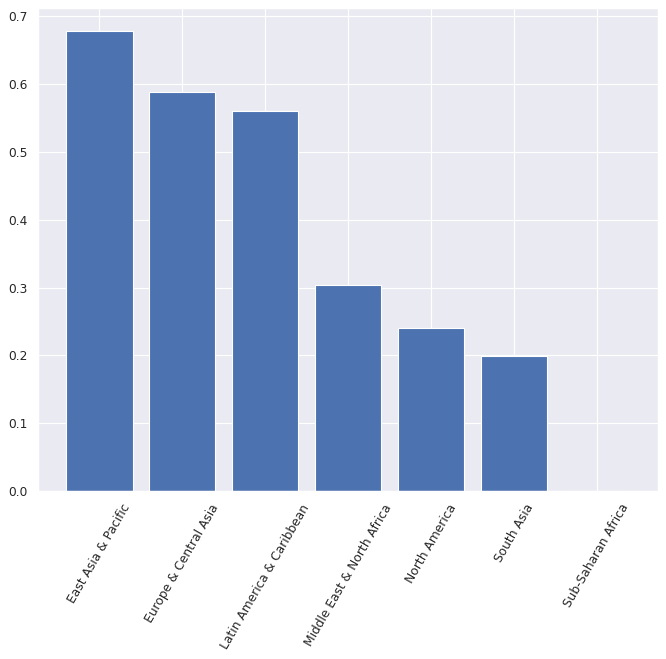

In [ ]:
sns.set()
plt.figure(figsize=(10,8), dpi= 80, )
plt.bar(region_potentiel.index, region_potentiel['SCORE_SYNT'].sort_values(ascending = False))
plt.xticks(rotation =60)

plt.show()

In [ ]:
print(region_potentiel.index.tolist())

['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa']


_______________________________________________________________________________________________________________________________________________________________________________________________________
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="color: #808080"> ===========================================================================
 </span>
## Partie 3 Analyse de donnée: 


<span style="color: #00FFFF"> On souhaite identifier les pays ayant un fort potentiel pour le projet d'expansion à l'international, voici la liste des critères que l'on recherche :
- Nombre d'inscription aux lycées et aux universités privées.
- Nombre d'utilisateurs d'internet 
- Revenue par habitant
- Espérance de la vie scolaire à partir de primaire
</span>

<span style="color: #00FFFF"> Nous allons maintenant créer un score entre 0 et 1 pour noter quatre variables de chaque pays (1 : signifie le plus, 0 : signifie le moins).
</span>

In [ ]:
def score(x):
    return (x-x.min())/(x.max()-x.min())

In [ ]:
country_potentiel['SCORE_PRIVATE'] = score(country_potentiel['Enrolment in upper secondary & in tertary education in private institutions (nomber)'])

In [ ]:
country_potentiel['SCORE_INTERNET'] = score(country_potentiel['Internet users (nomber)'])

In [ ]:
country_potentiel['SCORE_GNI'] = score(country_potentiel['GNI per capita, PPP (current international $)'])

In [ ]:
country_potentiel['SCORE_SCH_LIFE'] =score(country_potentiel['School life expectancy, primary to tertiary, both sexes (years)'])

<span style="color: #00FFFF"> On se demande si il existe une relation entre les variables. Pour démontrer cela, calculer la corrélation linéaire entre les deux variables.
</span>

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

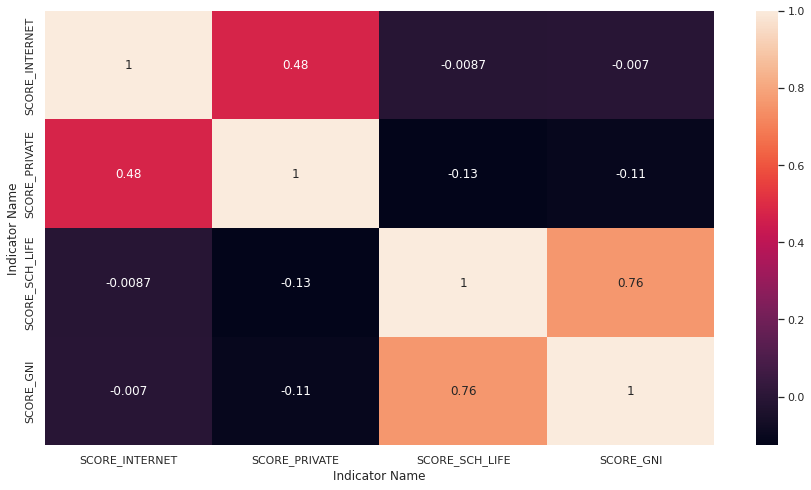

In [ ]:
sns.set()
plt.figure(figsize = (15,8))
sns.heatmap(country_potentiel[['SCORE_INTERNET', 'SCORE_PRIVATE', 'SCORE_SCH_LIFE','SCORE_GNI' ]].corr(),annot = True)

<span style="color: #00FFFF"> Utilisez les scores calculés précédemment pour construire un nouvel indicateur (`SCORE_SYNT`) synthétisant ces propriétés.
</span>

In [ ]:
country_potentiel['SCORE_SYNT'] =  0.2*country_potentiel['SCORE_PRIVATE'] +0.2*country_potentiel['SCORE_INTERNET'] + 0.3*country_potentiel['SCORE_GNI'] + 0.3*country_potentiel['SCORE_SCH_LIFE']
# ajouter un aure indicateur

<span style="color: #00FFFF"> On s'intéresse aux pays qui ont une note synthétisée supérieure à la moyenne.
</span>

In [ ]:
country_potentiel['SCORE_SYNT'].mean()

0.2394077499276743

In [ ]:
country_potentiel = country_potentiel[country_potentiel['SCORE_SYNT']>country_potentiel['SCORE_SYNT'].mean()]

In [ ]:
country_potentiel.shape

(33, 18)

<span style="color: #00FFFF"> Afficher tous les scores dans l'ordre décroissante de `SCORE_SYNT`.
</span>

In [84]:
country_potentiel

Indicator Name,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),Percentage of enrolment in upper secondary education in private institutions (%),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total","School life expectancy, primary to tertiary, both sexes (years)",Internet users (nomber),Enrolment in upper secondary & in tertary education in private institutions (nomber),SCORE_PRIVATE,SCORE_INTERNET,SCORE_GNI,SCORE_SCH_LIFE,SCORE_SYNT,colors
0,Slovak Republic,2.095430e+05,2.223390e+05,27640.0,77.882600,17.648880,15.195260,524493.0,384987.0,257152.0,5.413393e+06,15.060810,4.216091e+06,7.076698e+06,0.001410,0.005094,0.225658,0.577980,0.242392,red
1,Latvia,9.447400e+04,7.161300e+04,22690.0,75.234400,92.497414,2.393420,114899.0,141101.0,65183.0,2.012647e+06,15.974110,1.514203e+06,8.910001e+06,0.001806,0.000741,0.184288,0.649729,0.250714,red
2,Hungary,3.590400e+05,5.004380e+05,23730.0,72.643900,17.196409,26.523569,823261.0,629710.0,438494.0,9.893082e+06,15.791670,7.186721e+06,1.944760e+07,0.004083,0.009881,0.192980,0.635396,0.251306,red
3,Russian Federation,7.528163e+06,2.972383e+06,24570.0,67.970000,13.149130,1.845420,9200099.0,9651927.0,2906875.0,1.435069e+08,14.865620,9.754165e+07,1.044741e+08,0.022457,0.155468,0.200000,0.562645,0.264379,red
4,Lithuania,1.596950e+05,9.124700e+04,25990.0,68.452900,10.663450,1.098120,279166.0,221892.0,83321.0,2.957689e+06,16.490690,2.024624e+06,1.803100e+06,0.000271,0.001563,0.211868,0.690312,0.271021,red
5,Turkey,4.975690e+06,4.995623e+06,22110.0,46.250000,5.939280,3.136050,10533333.0,6299781.0,5235294.0,7.578733e+07,16.386250,3.505164e+07,4.521854e+07,0.009652,0.054779,0.179440,0.682107,0.271350,red
6,Estonia,6.480600e+04,4.389400e+04,26800.0,80.004300,83.830200,3.360370,74450.0,88867.0,40851.0,1.317997e+06,16.502750,1.054454e+06,5.580200e+06,0.001087,0.000000,0.218638,0.691259,0.273186,red
7,Poland,1.902718e+06,1.589524e+06,23970.0,62.849200,28.034740,15.920050,2555345.0,2673908.0,1369652.0,3.804020e+07,16.373930,2.390796e+07,7.864751e+07,0.016876,0.036823,0.194985,0.681139,0.273577,red
8,Israel,3.735810e+05,3.587010e+05,33470.0,70.250312,84.972473,5.883730,740586.0,563670.0,359933.0,8.059500e+06,15.963320,5.661824e+06,3.385460e+07,0.007197,0.007424,0.274384,0.648881,0.279904,red
9,Argentina,2.768211e+06,1.722700e+06,19730.0,59.900000,26.201900,29.621519,4144014.0,3460839.0,2054555.0,4.253992e+07,17.136190,2.548142e+07,1.235614e+08,0.026582,0.039359,0.159549,0.741023,0.283360,red


In [ ]:
country_potentiel[['SCORE_GNI', 'SCORE_INTERNET','SCORE_PRIVATE','SCORE_SCH_LIFE',  'SCORE_SYNT']].sort_values(by=['SCORE_SYNT'],ascending=False).head()

Indicator Name,SCORE_GNI,SCORE_INTERNET,SCORE_PRIVATE,SCORE_SCH_LIFE,SCORE_SYNT
Country Name,,,,,
United States,0.445967,0.362080,0.140602,0.694406,0.442648
Australia,0.366820,0.029386,0.011006,1.000000,0.418124
China,0.097200,1.000000,0.216802,0.466525,0.412478
Norway,0.560217,0.006081,0.001388,0.783124,0.404496
Belgium,0.363811,0.013107,0.015815,0.934862,0.395386


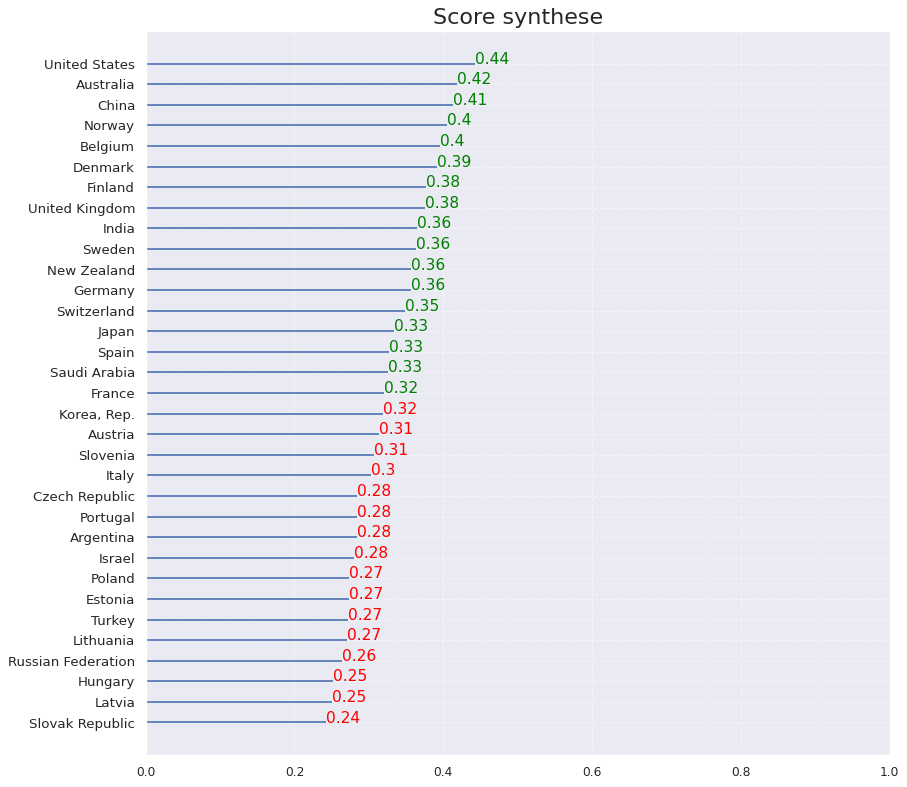

In [ ]:
# Prepare Data
x = country_potentiel.loc[:, 'SCORE_SYNT']
country_potentiel ['colors'] = ['red' if x < country_potentiel['SCORE_SYNT'].median() else 'green' for x in country_potentiel['SCORE_SYNT']]
country_potentiel.sort_values('SCORE_SYNT', inplace=True)
country_potentiel.reset_index(inplace=True)


sns.set()
plt.figure(figsize=(12,12), dpi= 80)
plt.hlines(y=country_potentiel.index, xmin=0, xmax=country_potentiel.SCORE_SYNT)
for x, y, tex in zip(country_potentiel.SCORE_SYNT, country_potentiel.index, country_potentiel.SCORE_SYNT):
                                                                                            t = plt.text(x, y, round(tex, 2), fontdict={'color':'red' if x < country_potentiel.SCORE_SYNT.median() else 'green', 'size':14})

 
plt.yticks(country_potentiel.index, country_potentiel['Country Name'], fontsize=12)
plt.title('Score synthese', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

plt.xlim(0, 1)
plt.show()

<span style="color: #00FFFF"> Affichez le nombre d'inscription aux lycées privées et aux universitées privées avec le diagramme en tuyaux d'orgue.
</span>

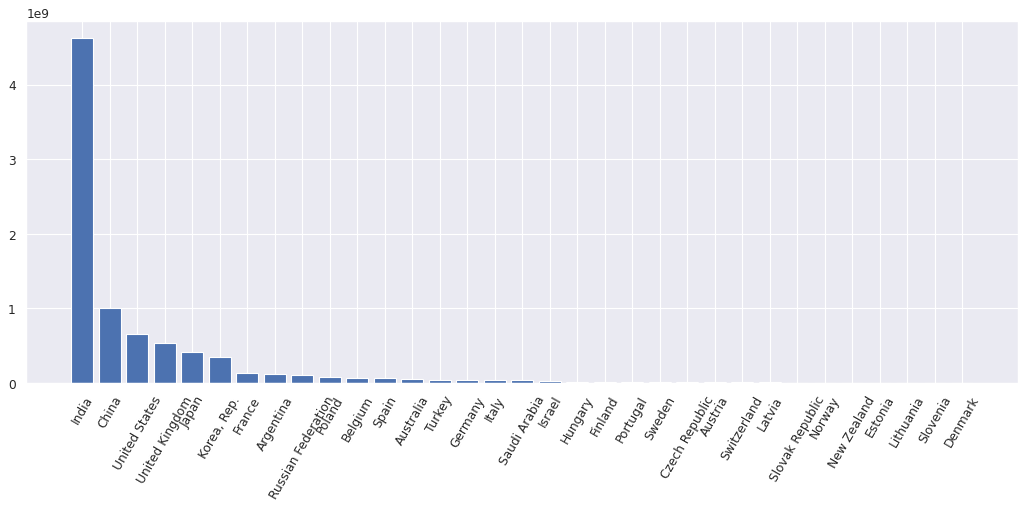

In [ ]:
plt.figure(figsize=(16,6), dpi= 80)
country_val = country_potentiel[['Country Name','Enrolment in upper secondary & in tertary education in private institutions (nomber)']]
country_val = country_val.sort_values(by='Enrolment in upper secondary & in tertary education in private institutions (nomber)',ascending = False)
plt.bar(country_val['Country Name'], country_val['Enrolment in upper secondary & in tertary education in private institutions (nomber)'])
plt.xticks(rotation =60)

plt.show()

<span style="color: #00FFFF"> Le dataFrame `country_top5` est l'extrait du dataframe `country_potentiel` et il contient les cinq pays ayants l'indicateur `SCORE_SYNT` le plus haut. </span>

In [ ]:
country_top10= country_potentiel.tail(10)
country_top10

Indicator Name,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),Percentage of enrolment in upper secondary education in private institutions (%),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total","School life expectancy, primary to tertiary, both sexes (years)",Internet users (nomber),Enrolment in upper secondary & in tertary education in private institutions (nomber),SCORE_PRIVATE,SCORE_INTERNET,SCORE_GNI,SCORE_SCH_LIFE,SCORE_SYNT,colors
23,Sweden,436603.0,517523.0,46720.0,94.783600,8.854960,17.904131,652850.0,688725.0,365086.0,9.600379e+06,18.105530,9.099585e+06,1.313190e+07,0.002719,0.012963,0.385123,0.817175,0.363826,green
24,India,28175136.0,55228676.0,5190.0,15.100000,53.879509,56.312611,173302416.0,117936408.0,97985136.0,1.278562e+09,11.554580,1.930629e+08,4.628133e+09,1.000000,0.309379,0.038028,0.302528,0.364042,green
25,United Kingdom,2386199.0,4117193.0,38780.0,89.844100,100.000000,73.993332,5221557.0,4195874.0,3084660.0,6.412823e+07,17.809010,5.761543e+07,5.432647e+08,0.117278,0.091135,0.318763,0.793880,0.375476,green
26,Finland,309009.0,359603.0,41430.0,91.514400,27.794979,18.798229,377759.0,339325.0,198013.0,5.438972e+06,19.269850,4.977443e+06,1.534880e+07,0.003198,0.006321,0.340911,0.908644,0.376770,green
27,Denmark,291147.0,311211.0,48210.0,94.629700,2.088290,1.974540,427864.0,358392.0,218587.0,5.614932e+06,19.176750,5.313393e+06,1.222498e+06,0.000145,0.006862,0.397576,0.901330,0.391073,green
28,Belgium,488488.0,773697.0,44170.0,82.170200,57.588112,58.942070,739771.0,675551.0,499996.0,1.118282e+07,19.603571,9.188943e+06,7.373440e+07,0.015815,0.013107,0.363811,0.934862,0.395386,green
29,Norway,255416.0,252083.0,67670.0,95.053400,16.522070,10.927750,391598.0,335553.0,199388.0,5.079623e+06,17.672100,4.828354e+06,6.974701e+06,0.001388,0.006081,0.560217,0.783124,0.404496,green
30,China,34091288.0,45963232.0,12270.0,45.800000,15.487300,10.352570,98007792.0,113027008.0,52732112.0,1.357380e+09,13.642100,6.216800e+08,1.003820e+09,0.216802,1.000000,0.097200,0.466525,0.412478,green
31,Australia,1390478.0,1079568.0,44530.0,83.453497,8.477660,36.769798,1732809.0,1606476.0,597060.0,2.311735e+07,20.432720,1.929224e+07,5.148350e+07,0.011006,0.029386,0.366820,1.000000,0.418124,green
32,United States,19972624.0,11646415.0,54000.0,71.400000,27.837290,8.175300,25117862.0,22489522.0,12845029.0,3.162049e+08,16.542810,2.257703e+08,6.511967e+08,0.140602,0.362080,0.445967,0.694406,0.442648,green


In [ ]:
country_top10_future= country.loc[country['Country Name'].isin(country_top10['Country Name'].tolist())]
country_top10_future = country_top10_future[['Country Name','Indicator Name','2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065','2070', '2075', '2080', '2085', '2090', '2095', '2100' ]]
country_top10_future = country_top10_future.loc[country_top10_future['Indicator Name'].isin(['Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'])].T

In [ ]:
country_top10_future.shape

(18, 10)

In [ ]:
country_top10_future

,131636,160956,245251,289231,336876,417506,630076,780341,846311,849976
Country Name,Australia,Belgium,China,Denmark,Finland,India,Norway,Sweden,United Kingdom,United States
Indicator Name,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...,Wittgenstein Projection: Mean years of schooli...
2025,14.0,13.5,10.4,11.5,11.4,9.5,13.1,12.9,12.7,12.6
2030,14.1,13.6,10.7,11.5,11.4,10.0,13.2,12.9,12.9,12.7
2035,14.1,13.7,11.0,11.6,11.5,10.4,13.2,13.0,13.1,12.7
2040,14.2,13.7,11.2,11.6,11.5,10.8,13.3,13.1,13.3,12.8
2045,14.3,13.8,11.5,11.7,11.6,11.2,13.4,13.1,13.5,12.8
2050,14.3,13.8,11.8,11.7,11.6,11.6,13.4,13.2,13.7,12.9
2055,14.4,13.9,12.0,11.7,11.6,11.9,13.5,13.2,13.8,12.9
2060,14.4,13.9,12.3,11.8,11.7,12.2,13.5,13.3,14.0,13.0


In [ ]:
country_top5_future.loc['Country Name',:]

NameError: name 'country_top5_future' is not defined

In [ ]:
country_top5_future.iloc[0,0]

'Australia'

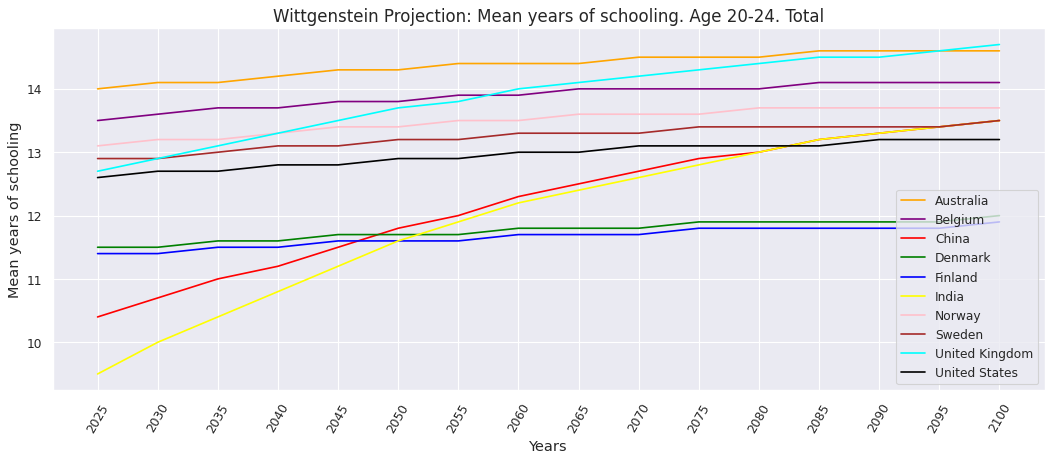

In [ ]:
x= country_top10_future.iloc[2:,:].index
y1=country_top10_future.iloc[2:,0]
y2=country_top10_future.iloc[2:,1]
y3=country_top10_future.iloc[2:,2]
y4=country_top10_future.iloc[2:,3]
y5=country_top10_future.iloc[2:,4]
y6=country_top10_future.iloc[2:,5]
y7=country_top10_future.iloc[2:,6]
y8=country_top10_future.iloc[2:,7]
y9=country_top10_future.iloc[2:,8]
y10=country_top10_future.iloc[2:,9]
colors=['orange', 'purple','red', 'green','blue','yellow', 'pink', 'brown','cyan','black']


sns.set()
plt.figure(figsize=(16,6), dpi= 80)
plt.gca().set_prop_cycle(color=colors)
plt.plot(x,y1,label=country_top10_future.iloc[0,0])
plt.plot(x,y2,label=country_top10_future.iloc[0,1])
plt.plot(x,y3,label=country_top10_future.iloc[0,2])
plt.plot(x,y4,label=country_top10_future.iloc[0,3])
plt.plot(x,y5,label=country_top10_future.iloc[0,4])
plt.plot(x,y6,label=country_top10_future.iloc[0,5])
plt.plot(x,y7,label=country_top10_future.iloc[0,6])
plt.plot(x,y8,label=country_top10_future.iloc[0,7])
plt.plot(x,y9,label=country_top10_future.iloc[0,8])
plt.plot(x,y10,label=country_top10_future.iloc[0,9])

plt.title('Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',fontsize=15)

plt.xlabel("Years",fontsize=13)
plt.xticks(rotation =60)

plt.ylabel("Mean years of schooling",fontsize=13)
plt.legend()
plt.show()